In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

In [5]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer=load_breast_cancer()

In [15]:
cancer.

<function Bunch.keys>

In [16]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
data= pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [20]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [24]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
transformed=scaler.transform(data)

In [26]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)

In [30]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
transformed.shape

(569, 30)

In [33]:
x=pca.transform(transformed)

In [34]:
x.shape

(569, 2)

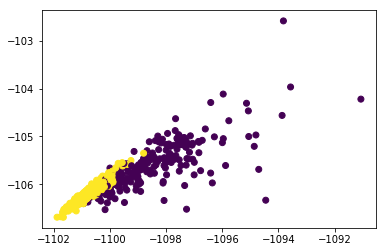

In [39]:
plt.scatter(x[:,0],x[:,1],c=cancer['target'])

In [40]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [50]:
df=pd.DataFrame(pca.components_,columns=cancer['feature_names'])


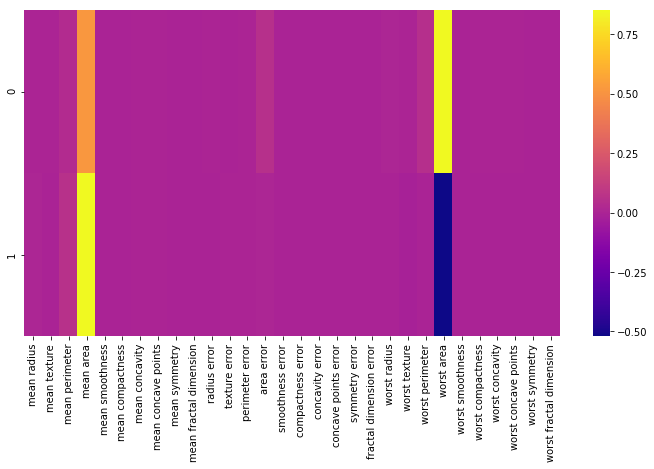

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df,cmap='plasma')